### Importing Necessary Libraries

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading data for April 2019 only

df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')

#Merging all the months data into a single csv

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.head()

all_months_data.to_csv('all_data.csv', index = False)


In [3]:
#Reading the updated csv

all_data = pd.read_csv('all_data.csv')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Cleaning the Data

In [4]:
#checking for missing values

all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

From the above result,we can see that there are missing values in all the columns and they have they same numbers of missing values.

In [5]:
#Checking for missing values in the 'Order ID' column

missing_data = all_data[all_data['Order ID'].isna()]
missing_data

#Checking for missing values in all columns

nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


There are 546 rows and 6 columns of missing values. It is best to drop these missing values in this case as they cant be replaced with either the mean or the frequency.

In [6]:
#Dropping the NaN values in the dataset. Axis=0:Drop rows which contain missing values and 
#how='all':If all values are NA, drop that row or column

all_data = all_data.dropna(axis=0, how = 'all')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Now, all missing values in all columns have been dropped.

In [7]:
#Counting the uniques values in each column

print(all_data['Order ID'].value_counts())
print(all_data['Product'].value_counts())
print(all_data['Quantity Ordered'].value_counts())
print(all_data['Price Each'].value_counts())
print(all_data['Order Date'].value_counts())
print(all_data['Purchase Address'].value_counts())

Order ID    355
160873        5
165665        4
277875        4
312407        4
           ... 
195462        1
265969        1
235694        1
292313        1
199520        1
Name: Order ID, Length: 178438, dtype: int64
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                         355
Name: Product, dtype: int64
1                   168552
2   

When the .value_counts() was tested, we observed that each column of the dataset had an unnecessary value.

In [8]:
#removing  errors in 'Quantity Ordered' column 

all_data = all_data[all_data['Quantity Ordered'].str[0:] != 'Quantity Ordered']
all_data

#checking the count of unique values in the 'Ordered Quantity' column
print(all_data['Quantity Ordered'].value_counts())

1    168552
2     13324
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64


The error has been corrected in all columns.

## Augmenting the Data.

### Adding a Month Column

In [9]:
#adding a 'Month' column to the data extracted from the 'Order Date' column

all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()

#changing the datatype of the 'Month' from string to Integer
all_data['Month'] = all_data['Month'].astype('int32')
all_data

C:\Users\Home\Anaconda3\myudacityproject\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Home\Anaconda3\myudacityproject\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [10]:
#converting 'Price Each' column to type float
all_data['Price Each'].astype('float')

#converting 'Quantity Ordered' column to type int
all_data['Quantity Ordered'].astype('int32')

#converting 'Quantity Ordered' and 'Price Each' columns to int and float respectively 
all_data = all_data.astype({"Price Each":'float', "Quantity Ordered":'int32'})

#converting 'Order Date' column to type datetime 
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


In [11]:
#confirming the datatypes of the columns

all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(3)
memory usage: 9.9+ MB


All columns have now been set to their correct datatypes.

### Adding a 'Sales' column to the data

In [12]:
#Multiplying the 'Quantity Ordered' and 'Price Each' columns to get the 'Sales' column.

all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99


### Adding Hour and Minute columns

In [13]:
#Adding a 'Hour' column
all_data['Hour'] = all_data['Order Date'].dt.hour

#Adding a 'Minute' column
all_data['Minute'] = all_data['Order Date'].dt.minute

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9,27
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,20,56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,16,0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,17,30


#### Question 1: What was the best month for sales? How much was made that month?

In [17]:
#Getting the sum of the sales grouped by month

Monthly_sales = all_data.groupby('Month').sum()
Monthly_sales.sort_values(by = 'Month',ascending=False)['Sales']

Month
12    4.613443e+06
11    3.199603e+06
10    3.736727e+06
9     2.097560e+06
8     2.244468e+06
7     2.647776e+06
6     2.577802e+06
5     3.152607e+06
4     3.390670e+06
3     2.807100e+06
2     2.202022e+06
1     1.822257e+06
Name: Sales, dtype: float64

Month 12 which is December was the best month for sales with approximately 4.6million usd with worst month being January with approximately 1.8million usd.

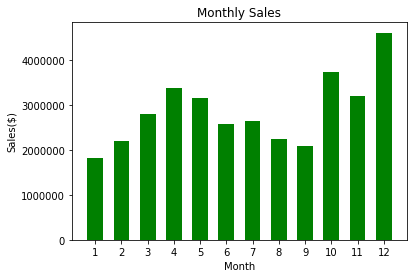

In [18]:
#Plotting a barchart to visualize the Monthly sales.

#range(1,13) is used to creating a colllection of numbers from 1 to 12(13 not inclusive)
Months = range(1,13)

plt.bar(Months, Monthly_sales['Sales'], color ='g',
        width = 0.6)
plt.xticks(Months) 
plt.xlabel('Month')
plt.ylabel('Sales($)')
plt.title('Monthly Sales')
plt.show()

### Adding 'City' column

In [19]:
#Adding City Column

#Extracting the city from the 'Purchase Address' column by splitting 
def get_city(address):
    return address.split(',')[1]

#Extracting the state from the 'Purchase Address' column by splitting
def get_state(address):
    return address.split(',')[2].split(' ')[1]


all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ', ' + ' ' + get_state(x))
                                        
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Hour,Minute,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8,46,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22,30,"Boston, MA"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14,38,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14,38,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9,27,"Los Angeles, CA"
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,20,56,"Los Angeles, CA"
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,16,0,"San Francisco, CA"
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,7,39,"San Francisco, CA"
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,17,30,"San Francisco, CA"


Now, we have the 'city' column showing the city and state extracted from the 'Purchase Address' column.

#### Question 2: What City had the highest Sales?

In [22]:
best_city = all_data.groupby('City').sum()
best_city.sort_values(by='Sales',ascending=False)['Sales']

City
 San Francisco,  CA    8.262204e+06
 Los Angeles,  CA      5.452571e+06
 New York City,  NY    4.664317e+06
 Boston,  MA           3.661642e+06
 Atlanta,  GA          2.795499e+06
 Dallas,  TX           2.767975e+06
 Seattle,  WA          2.747755e+06
 Portland,  OR         1.870732e+06
 Austin,  TX           1.819582e+06
 Portland,  ME         4.497583e+05
Name: Sales, dtype: float64

San Francisco,CA has the highest number of sales in 2019

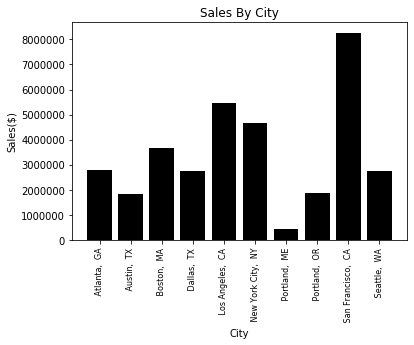

In [23]:
#.unique() gets us the unique values in a column
#Cities = all_data['City'].unique()

#Grouping the cities so they are in the same format as the Sales(x axis and y axis must be in the same order.)
Cities = [city for city, df in all_data.groupby('City')]

plt.bar(Cities,best_city['Sales'],color ='black',
        width = 0.8)
plt.xticks(Cities, rotation = 'vertical', size = 8)
plt.xlabel('City')
plt.ylabel('Sales($)')
plt.title('Sales By City')
plt.show()

The barchart aslo gives the same result as the code above.

#### Question 3: What shouldwe display Advertisment maximize the likelihood of sales?

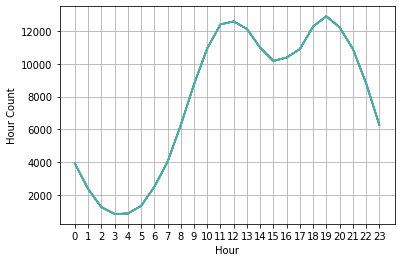

In [24]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Hour Count')
plt.show()

Hours 12 and 19 have the peak sales and it would be best to display the advertistment about 30-60mins before then. At these hours, most people will be on break or off work.

#### Question 4: What products are most often sold together?

In [26]:
#Checking the 'Order ID' column for duplicates
#keep=False : Mark all duplicates as True

dup = all_data[all_data['Order ID'].duplicated(keep=False)]
dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Hour,Minute,City
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14,38,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14,38,"Los Angeles, CA"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,19,42,"Los Angeles, CA"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,19,42,"Los Angeles, CA"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,11,31,"Boston, MA"


In [27]:
#Adding a new column to accomodate the grouped products.

dup['Grouped Products'] = dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
dup

C:\Users\Home\Anaconda3\myudacityproject\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Hour,Minute,City,Grouped Products
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14,38,"Los Angeles, CA","Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14,38,"Los Angeles, CA","Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,19,42,"Los Angeles, CA","Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,19,42,"Los Angeles, CA","Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,11,31,"Boston, MA","Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,20,18,"Atlanta, GA","34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,0,25,"Atlanta, GA","Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,0,25,"Atlanta, GA","Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,13,49,"San Francisco, CA","Google Phone,USB-C Charging Cable"


In [28]:
#Dropping duplicates of 'Order ID ' and 'Grouped Products' columns

dup = dup[['Order ID', 'Grouped Products']].drop_duplicates()
dup

,Order ID,Grouped Products
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [30]:
#counting the unique pairs of Grouped Products
from itertools import combinations
from collections import Counter

count = Counter()

for row in dup['Grouped Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key,value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92



The combination ('iPhone','Lightning Charging Cable) with value 1005 are the most commonly sold pairs

#### Question 5: What product sold the most? Why?

In [31]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
quantity_ordered.sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int32

We can see that product 'AAA Batteries(4-pack)' sold the most and it might be due to the cost of this product to the cost of a LG Washing machine.

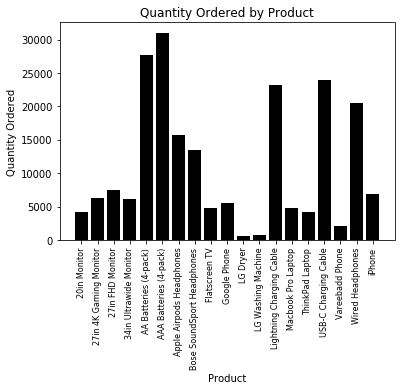

In [32]:
#Grouping the products so they are in the same format as the Sales(x axis and y axis must be in the same order.)
Products = [product for product, df in product_group]

plt.bar(Products,quantity_ordered,color ='black',
        width = 0.8)
plt.xticks(Products, rotation = 'vertical', size = 8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered by Product')
plt.show()

In [33]:
Prices = all_data.groupby('Product').mean()['Price Each']
Prices.sort_values()

Product
AAA Batteries (4-pack)           2.99
AA Batteries (4-pack)            3.84
USB-C Charging Cable            11.95
Wired Headphones                11.99
Lightning Charging Cable        14.95
Bose SoundSport Headphones      99.99
20in Monitor                   109.99
27in FHD Monitor               149.99
Apple Airpods Headphones       150.00
Flatscreen TV                  300.00
34in Ultrawide Monitor         379.99
27in 4K Gaming Monitor         389.99
Vareebadd Phone                400.00
Google Phone                   600.00
LG Washing Machine             600.00
LG Dryer                       600.00
iPhone                         700.00
ThinkPad Laptop                999.99
Macbook Pro Laptop            1700.00
Name: Price Each, dtype: float64

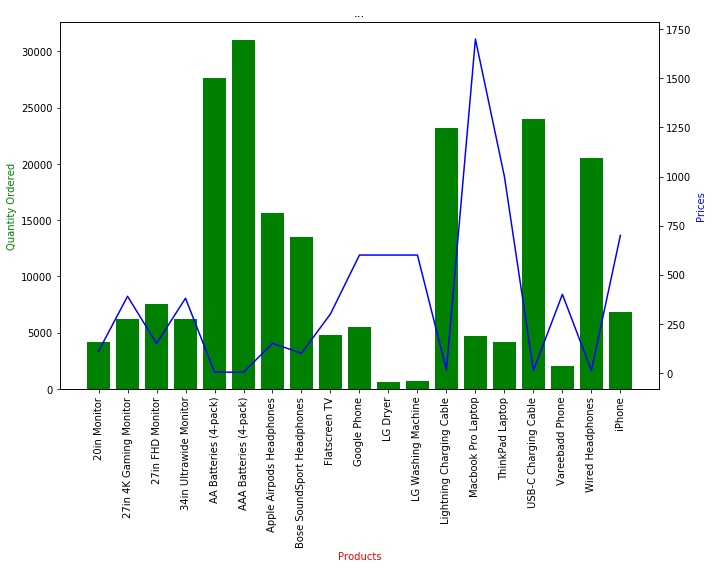

In [35]:
#Showing the relationship between prices and quantity ordered of products

# using subplots() function
fig, ax = plt.subplots(figsize=(10,8))
plt.title('...')

# using the twinx() for creating another
# axes object for secondary y-Axis

ax2 = ax.twinx()

ax.bar(Products, quantity_ordered, color = 'g')
ax2.plot(Products, Prices, color = 'b')

# giving labels to the axises
ax.set_xlabel('Products', color = 'r')
ax.set_ylabel('Quantity Ordered', color = 'g')

# secondary y-axis label
ax2.set_ylabel('Prices', color = 'b')

ax.set_xticklabels(Products, rotation='vertical', size=10)

# defining display layout
plt.tight_layout()

# show plot
plt.show()
